## 1.Importing the libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## 2.Importing the dataset

In [2]:
df=pd.read_csv(r"C:\Users\shiva\Documents\British Airways\customer_booking.csv",encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The .info() method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

num_passengers = number of passengers travelling

sales_channel = sales channel booking was made on

trip_type = trip Type (Round Trip, One Way, Circle Trip)

purchase_lead = number of days between travel date and booking date

length_of_stay = number of days spent at destination

flight_hour = hour of flight departure

flight_day = day of week of flight departure

route = origin -> destination flight route

booking_origin = country from where booking was made

wants_extra_baggage = if the customer wanted extra baggage in the booking

wants_preferred_seat = if the customer wanted a preferred seat in the booking

wants_in_flight_meals = if the customer wanted in-flight meals in the booking

flight_duration = total duration of flight (in hours)

booking_complete = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping={
    'Mon':1,
    'Tue':2, 
    'Wed':3,
    'Thu':4,
    'Fri':5,
    'Sat':6,
    'Sun':7
}
df['flight_day']=df['flight_day'].map(mapping)

In [6]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The .describe() method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## 3.Exploratory Data Analysis

Exploratory Data Analysis (EDA), also known as Data Exploration, it is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In this step, we will perform the below operations:

3.1) understanding Your Variables
   
    3.1.1) Head of the dataset
    
    3.1.2) The shape of the dataset
    
    3.1.3) List types of all columns
    
    3.1.4) Info of the dataset
    
    3.1.5) Summary of the dataset
    
3.2) Data Cleaning
    
    3.2.1) Checking the Duplicates
    
    3.2.2) Check the Null values

3.1.1) Head of the Dataset
The head() function will tell you the top records in the dataset. By default, python shows you only the top 5 records.

This head(n) function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. By default it will show 5 rows.

In [13]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [14]:
df.shape

(50000, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [16]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


By looking the description of the data we can visualize that there may be some outlier or the data is normalized or not.

In [18]:
df[df.duplicated()]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,7,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,5,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,2,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49852,2,Internet,RoundTrip,204,6,14,2,PENTPE,Malaysia,1,0,0,4.67,0
49902,1,Mobile,RoundTrip,106,6,11,5,PENTPE,Taiwan,1,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,4,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,4,PENTPE,Malaysia,0,0,1,4.67,0


In [21]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [22]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49276,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49277,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49278,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49279,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [23]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [37]:
for i in df.columns:
    print('Features:',i)
    print(df[i].unique(),'\n')
    print(i,'------->',df[i].nunique())

Features: num_passengers
[2 1 3 4 6 5 7 9 8] 

num_passengers -------> 9
Features: sales_channel
['Internet' 'Mobile'] 

sales_channel -------> 2
Features: trip_type
['RoundTrip' 'CircleTrip' 'OneWay'] 

trip_type -------> 3
Features: purchase_lead
[262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 157 145 241 139  59 396 280  79 380 132
 121 419  58 115 236 225 116 191 275 417 159  92 106 218 295  12 305 235
 332 125 204 310 368 169 214 155 325 130 189 226 122  88 211 188 129 149
  38 194 183  40  95 

## 4) Data Visualization

4.1) Histograms (univariate analysis)
Histograms are one of the most common graphs used to display numeric data.
distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

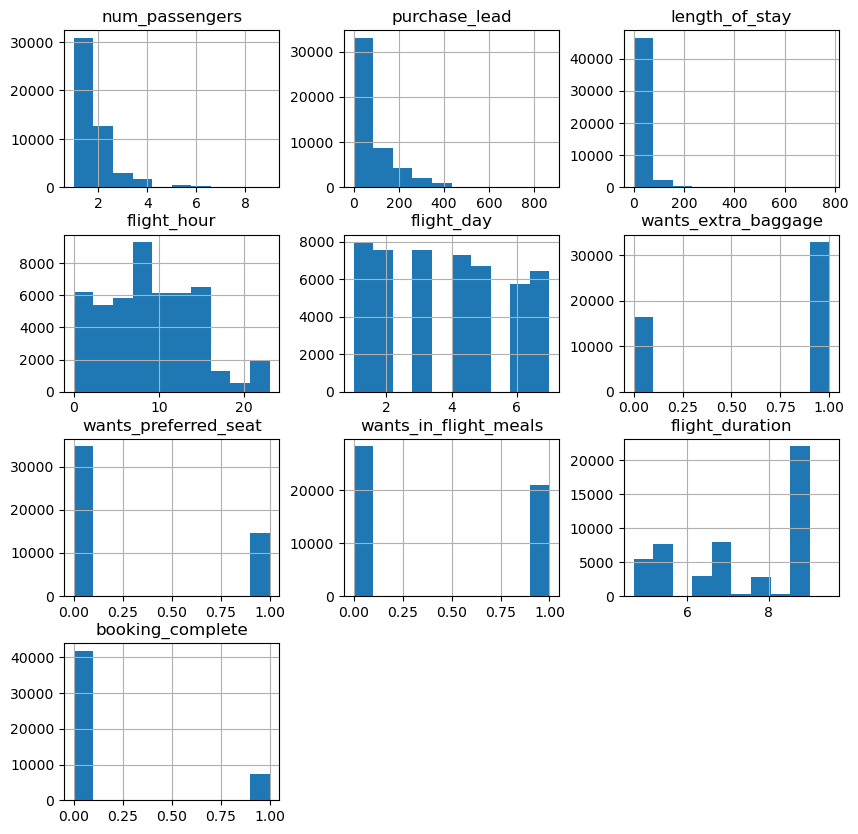

In [38]:
# Histogram of each feature
df.hist(bins=10,figsize=(10,10))
plt.show()

4.2) Scatter plot (bivariate analysis)

A Scatterplot is a type of graph which 'plots' the values along two axes, like age and height. Scatterplots are useful for many reasons. like correlation matrices, It allows you to quickly understand a relationship between two variables.

## Target variable[num_passengers]

In [44]:
df.num_passengers.describe()

count    49281.000000
mean         1.590187
std          1.016538
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: num_passengers, dtype: float64

(array([30879., 12669.,  2882.,  1767.,     0.,   544.,   281.,   107.,
           88.,    64.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

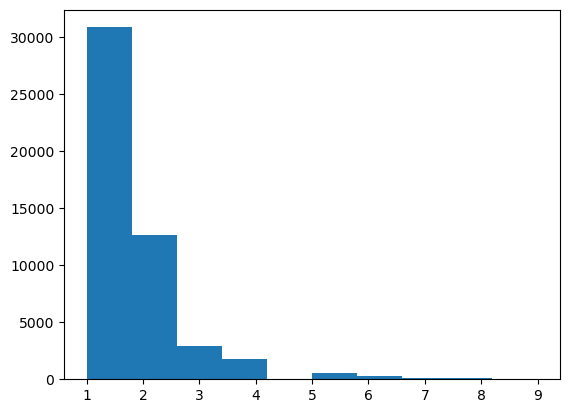

In [45]:
plt.hist(df.num_passengers)

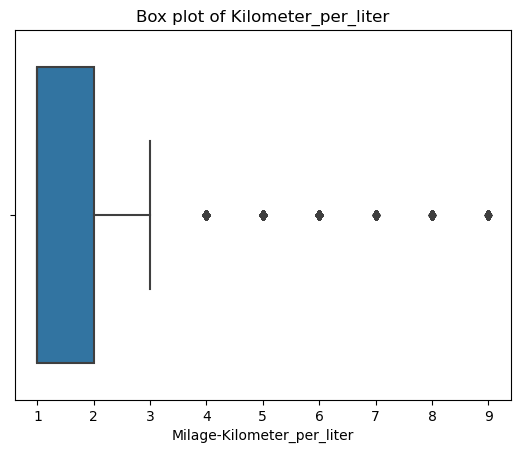

In [46]:
# box plot of Kilometer_per_liter
sns.boxplot(x= df.num_passengers,)
plt.xlabel('Milage-Kilometer_per_liter')
plt.title('Box plot of Kilometer_per_liter')
plt.show()

### Now will check for outliers (If we have extreme outliers we need to drop the outliers)

In [48]:
# How many outliers are present
# checking the outliers

# Now we are going to perform IQR [Inter Quartile Range] using IQR = Q3 - Q1
kpl_IQR=df.num_passengers.describe()['75%']-df.num_passengers.describe()['25%']
print('kpl_IQR =',kpl_IQR)

# Now will try to create upper end using UE= Q3+1.5*IQR
kpl_uplim=df.num_passengers.describe()['75%']+1.5*kpl_IQR
print('kpl_uplim =',kpl_uplim)

kpl_IQR = 1.0
kpl_uplim = 3.5


In [49]:
len(df.num_passengers[df.num_passengers>kpl_uplim])

2851

### Sales_channel

In [56]:
df.sales_channel.value_counts()

sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64

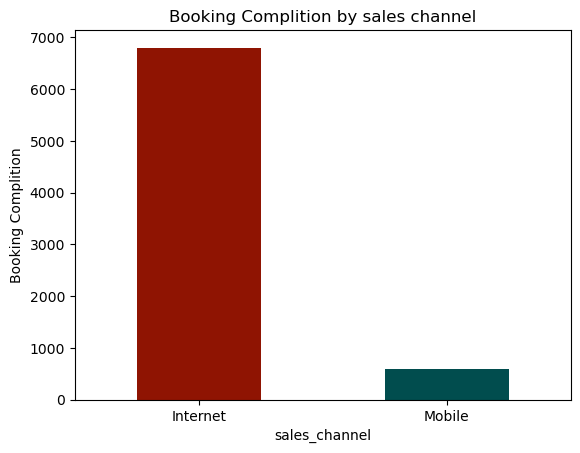

In [75]:
#booking complition by sales channel 

df.groupby('sales_channel')['booking_complete'].sum().plot(kind='bar',color=['#8f1402','#014d4e','#4b006e'])
plt.ylabel('Booking Complition')
plt.xticks(rotation=0)
plt.title('Booking Complition by sales channel')
plt.show()

In [65]:
# If you want to print the numbers you can print
df.groupby('sales_channel')['booking_complete'].sum()

sales_channel
Internet    6802
Mobile       589
Name: booking_complete, dtype: int64

###### The above graph represents that the number of booking complition is done by internet and counts total value of 6802.

### Now will perform some statistical test to check Origin is a good predictor or not

##### Importing the Libraries for Statistical test

In [66]:
# Statistical test

# t-test
from scipy.stats import ttest_ind
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# chi-square
from scipy.stats import (chi2,chi2_contingency)
import statsmodels.formula.api as smf

### Anova Test

In [68]:
model_sales_channel = ols('booking_complete ~sales_channel ',data = df).fit()
anova_sales_channel = sm.stats.anova_lm(model_sales_channel)
anova_sales_channel

,df,sum_sq,mean_sq,F,PR(>F)
sales_channel,1.0,9.712950,9.712950,76.30464,2.505851e-18
Residual,49279.0,6272.809523,0.127292,NaN,NaN


sales_channel is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)

If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant.

# Trip type (its a categorical variable)

In [69]:
df.trip_type.value_counts()

trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64

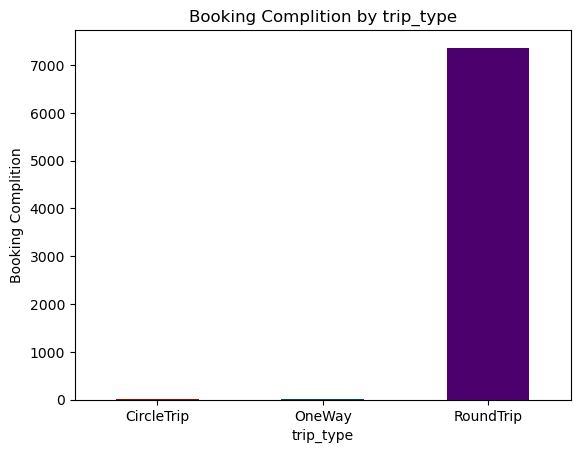

In [74]:
#booking complition by sales channel 

df.groupby('trip_type')['booking_complete'].sum().plot(kind='bar',color=['#8f1402','#014d4e','#4b006e'])
plt.ylabel('Booking Complition')
plt.xticks(rotation=0)
plt.title('Booking Complition by trip_type')
plt.show()

In [72]:
# If you want to print the numbers you can print
df.groupby('trip_type')['booking_complete'].sum()

trip_type
CircleTrip       5
OneWay          20
RoundTrip     7366
Name: booking_complete, dtype: int64

##### The above graph represents that the booking complition of the flight tickets is maximum done for the Round trip and then One way and the least is done for the circle trip

A “round trip” refers to a journey where you travel to a specific destination and then return to your starting point, usually following the same route.

## anova Test

In [73]:
model_trip_type = ols('booking_complete ~trip_type ',data = df).fit()
anova_trip_type = sm.stats.anova_lm(model_trip_type)
anova_trip_type

,df,sum_sq,mean_sq,F,PR(>F)
trip_type,2.0,5.096284,2.548142,20.002996,2.071732e-09
Residual,49278.0,6277.426190,0.127388,NaN,NaN


trip_type is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)

If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant

### purchase_lead is a continuous variable

In [79]:
df['purchase_lead'].describe()

count    49281.000000
mean        84.723281
std         90.410229
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

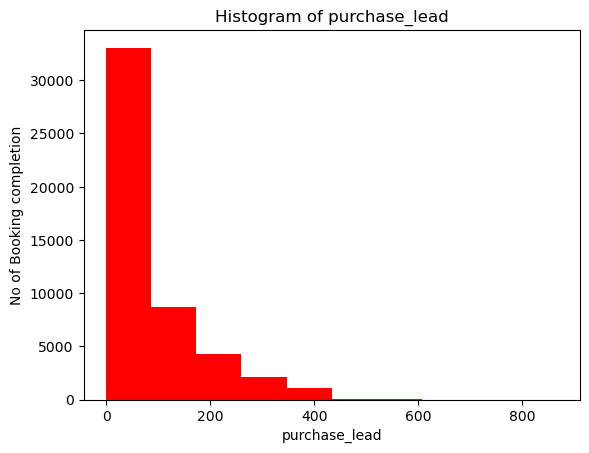

In [81]:
# histogram
plt.hist(df.purchase_lead,color='red')
plt.xlabel('purchase_lead')
plt.ylabel('No of Booking completion')
plt.title('Histogram of purchase_lead')
plt.show()

<Axes: xlabel='purchase_lead'>

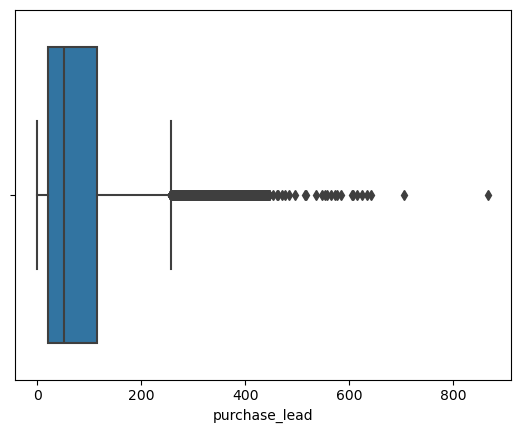

In [82]:
sns.boxplot(x = df.purchase_lead)

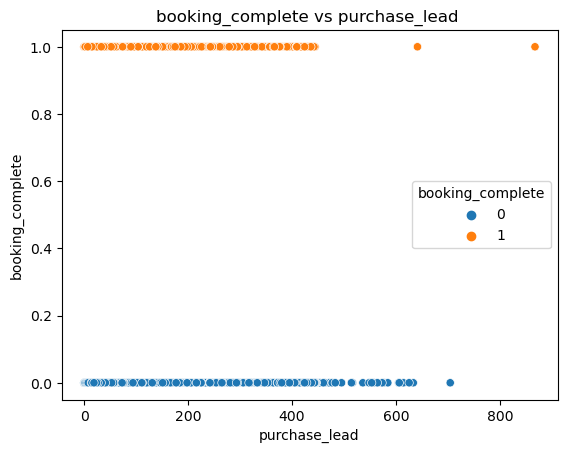

In [84]:
# scatterplot of booking_complete vs purchase_lead
sns.scatterplot(x='purchase_lead',y='booking_complete',data=df,hue='booking_complete')
plt.title('booking_complete vs purchase_lead ')
plt.show()

In [85]:
# will check the correlation coefficient between purchase lead and booking complition
np.corrcoef(df.purchase_lead,df.booking_complete)

array([[ 1.        , -0.02213189],
       [-0.02213189,  1.        ]])

#### The plot illustrates a negative correlation between purchase_lead and booking complition, indicating that as displacement increases, mileage tends to decrease
It is 2.21% negatively correlated

###### In this case, -0.02213189 is very close to 0, suggesting that there is almost no linear relationship between the two variables.

In [87]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49276,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49277,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49278,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49279,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


### length_of_stay is a continuous variable

In [88]:
df.length_of_stay.describe()

count    49281.000000
mean        23.053976
std         33.832149
min          0.000000
25%          5.000000
50%         17.000000
75%         28.000000
max        778.000000
Name: length_of_stay, dtype: float64

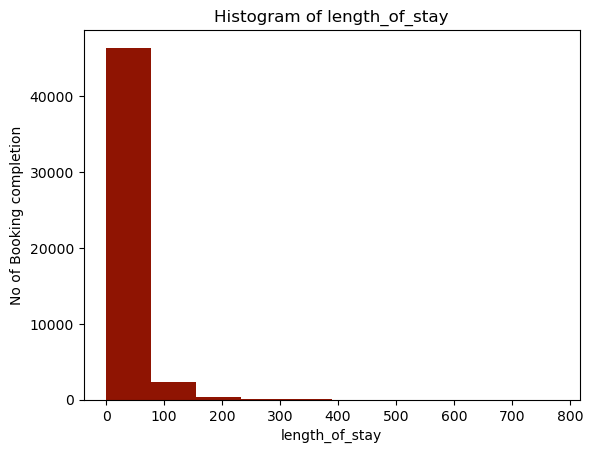

In [162]:
# histogram
plt.hist(df.length_of_stay,color='#8f1402')
plt.xlabel('length_of_stay')
plt.ylabel('No of Booking completion')
plt.title('Histogram of length_of_stay')
plt.show()

<Axes: xlabel='length_of_stay'>

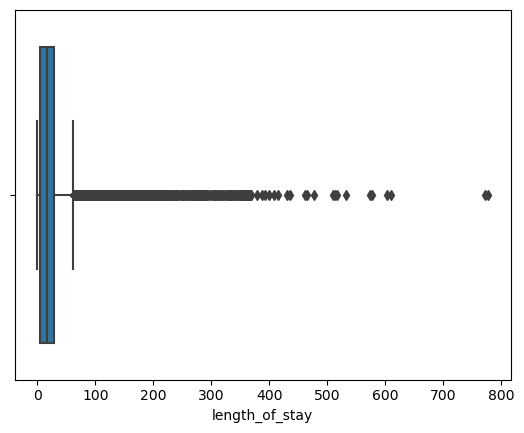

In [90]:
sns.boxplot(x = df.length_of_stay)

In [92]:
# checking the outliers
hp_IQR=df.length_of_stay.describe()['75%']-df.length_of_stay.describe()['25%']
print('hp_IQR =',hp_IQR)
hp_uplim=df.length_of_stay.describe()['75%']+1.5*hp_IQR
print('hp_uplim =',hp_uplim)
len(df.length_of_stay[df.length_of_stay>hp_uplim]) 

hp_IQR = 23.0
hp_uplim = 62.5


3748

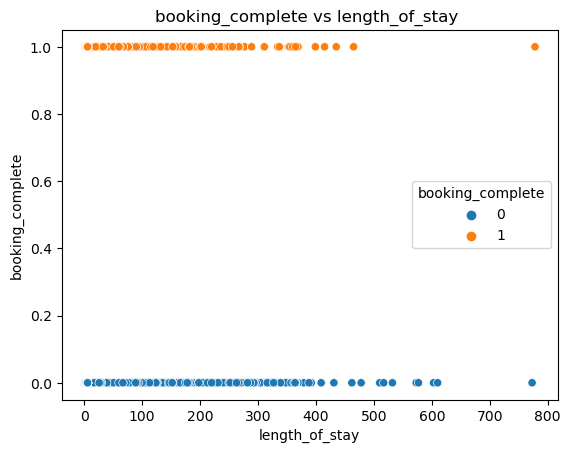

In [91]:
# scatterplot of booking_complete vs length_of_stay
sns.scatterplot(x='length_of_stay',y='booking_complete',data=df,hue='booking_complete')
plt.title('booking_complete vs length_of_stay ')
plt.show()

In [93]:
# will check the correlation coefficient between length of stay and booking complition
np.corrcoef(df.length_of_stay,df.booking_complete)

array([[ 1.       , -0.0420799],
       [-0.0420799,  1.       ]])

#### The plot illustrates a negative correlation between length of stay and booking complition, indicating that as displacement increases, mileage tends to decrease
It is 4.2% negatively correlated

In this case, -0.0420799 is close to 0, suggesting that there is almost no linear relationship between the two variables.

### flight_hour is a continuous variable

In [95]:
df.flight_hour.describe()

count    49281.000000
mean         9.070676
std          5.413099
min          0.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         23.000000
Name: flight_hour, dtype: float64

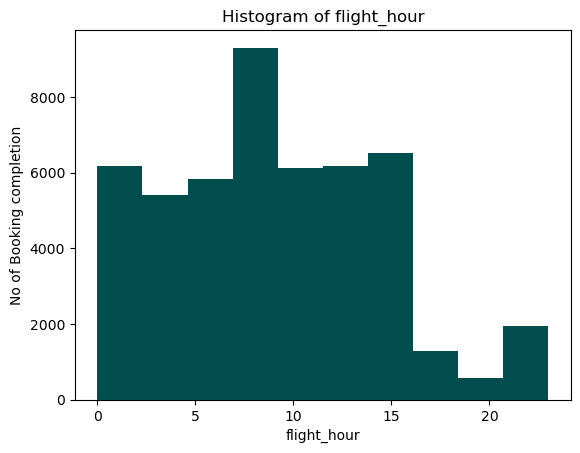

In [163]:
# histogram
plt.hist(df.flight_hour,color='#014d4e')
plt.xlabel('flight_hour')
plt.ylabel('No of Booking completion')
plt.title('Histogram of flight_hour')
plt.show()

<Axes: xlabel='flight_hour'>

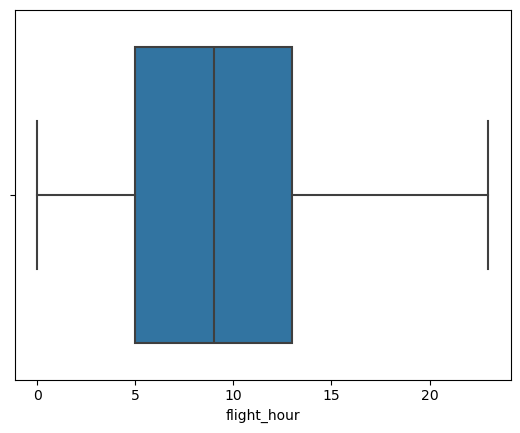

In [97]:
sns.boxplot(x = df.flight_hour)

Here we can see that this feature doesn't has any outlier

In [98]:
# checking the outliers
hp_IQR=df.flight_hour.describe()['75%']-df.flight_hour.describe()['25%']
print('hp_IQR =',hp_IQR)
hp_uplim=df.flight_hour.describe()['75%']+1.5*hp_IQR
print('hp_uplim =',hp_uplim)
len(df.flight_hour[df.flight_hour>hp_uplim]) 

hp_IQR = 8.0
hp_uplim = 25.0


0

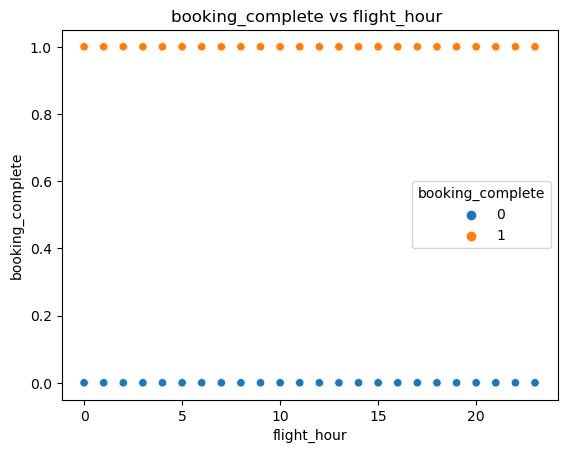

In [99]:
# scatterplot of booking_complete vs flight_hour 
sns.scatterplot(x='flight_hour',y='booking_complete',data=df,hue='booking_complete')
plt.title('booking_complete vs flight_hour ')
plt.show()

In [101]:
# will check the correlation coefficient between flight hour and booking complition
np.corrcoef(df.flight_hour,df.booking_complete)

array([[1.        , 0.00670505],
       [0.00670505, 1.        ]])

#### The plot illustrates a positively correlation between length of stay and booking complition, indicating that as displacement increases, mileage tends to decrease
It is 0.6% positively correlated

In this case, 0.00670505 is very close to 0, suggesting that there is almost no linear relationship between the two variables.

### flight day is a continuous variable

In [104]:
df.flight_day.describe()

count    49281.000000
mean         3.813620
std          1.991913
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: flight_day, dtype: float64

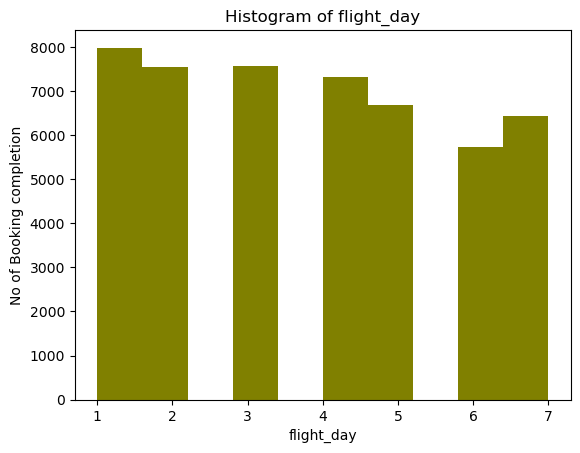

In [161]:
# histogram
plt.hist(df.flight_day,color='olive')
plt.xlabel('flight_day')
plt.ylabel('No of Booking completion')
plt.title('Histogram of flight_day')
plt.show()

<Axes: xlabel='flight_day'>

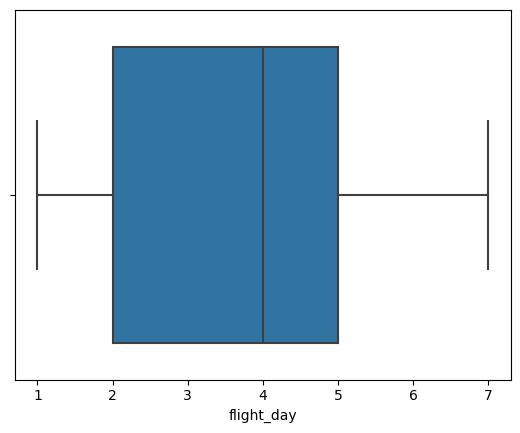

In [106]:
sns.boxplot(x = df.flight_day)

In [107]:
# checking the outliers
hp_IQR=df.flight_hour.describe()['75%']-df.flight_hour.describe()['25%']
print('hp_IQR =',hp_IQR)
hp_uplim=df.flight_hour.describe()['75%']+1.5*hp_IQR
print('hp_uplim =',hp_uplim)
len(df.flight_hour[df.flight_hour>hp_uplim])

hp_IQR = 8.0
hp_uplim = 25.0


0

In [108]:
# will check the correlation coefficient between flight day and booking complition
np.corrcoef(df.flight_day,df.booking_complete)

array([[ 1.        , -0.00706057],
       [-0.00706057,  1.        ]])

#### The plot illustrates a negatively correlation between length of stay and booking complition, indicating that as displacement increases, mileage tends to decrease
It is 0.07% negatively correlated

In this case, -0.00706057 is very close to 0, suggesting that there is almost no linear relationship between the two variables.

### Route is a categorical variable

In [110]:
df.route.value_counts()

route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

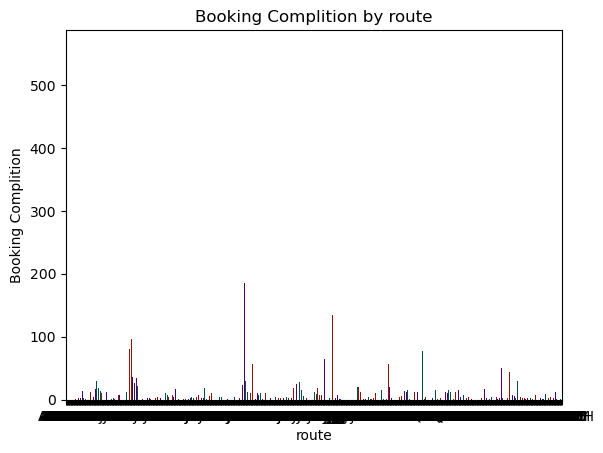

In [111]:
#booking complition by route
df.groupby('route')['booking_complete'].sum().plot(kind='bar',color=['#8f1402','#014d4e','#4b006e'])
plt.ylabel('Booking Complition')
plt.xticks(rotation=0)
plt.title('Booking Complition by route')
plt.show()

In [112]:
# If you want to print the numbers you can print
df.groupby('route')['booking_complete'].sum()

route
AKLDEL    0
AKLHGH    0
AKLHND    0
AKLICN    0
AKLKIX    0
         ..
TRZWUH    0
TRZXIY    0
TWUWUH    1
TWUXIY    2
URTXIY    0
Name: booking_complete, Length: 799, dtype: int64

### booking_origin is a categorical data

In [115]:
df.booking_origin.value_counts()

booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

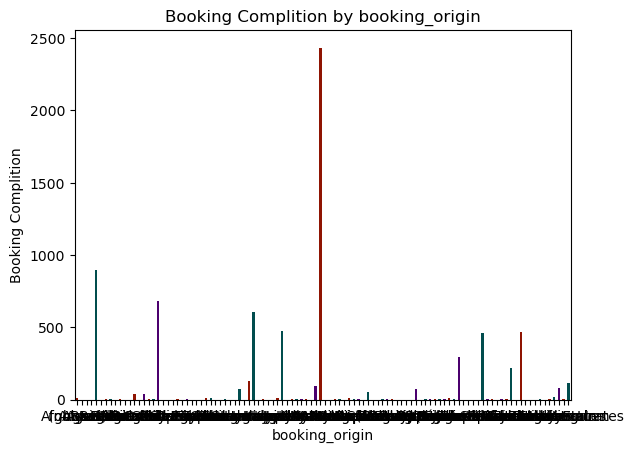

In [116]:
#booking complition by booking_origin 
df.groupby('booking_origin')['booking_complete'].sum().plot(kind='bar',color=['#8f1402','#014d4e','#4b006e'])
plt.ylabel('Booking Complition')
plt.xticks(rotation=0)
plt.title('Booking Complition by booking_origin')
plt.show()

In [120]:
booking_origin_counts=df.booking_origin.value_counts()
booking_origin_counts

booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [126]:
top_5_booking_origin=booking_origin_counts[booking_origin_counts>=3284]
top_5_booking_origin

booking_origin
Australia      17691
Malaysia        7055
South Korea     4502
Japan           3819
China           3284
Name: count, dtype: int64

### wants_extra_baggage is a categorical variable

In [134]:
df.wants_extra_baggage.value_counts()

wants_extra_baggage
1    32931
0    16350
Name: count, dtype: int64

Where 1 represents the people who wants extra baggage and 0 represents that the people who do not need any extra baggage

In [136]:
# If you want to print the numbers you can print
df.groupby('wants_extra_baggage')['booking_complete'].sum()

wants_extra_baggage
0    1885
1    5506
Name: booking_complete, dtype: int64

here the people who wants the extra baggage and they have completed the booking are 5506 and the people who didn't want extra baggage they have commpleted their booking is 1885

### Anova Test

In [137]:
model_wants_extra_baggage = ols('booking_complete ~wants_extra_baggage ',data = df).fit()
anova_wants_extra_baggage = sm.stats.anova_lm(model_wants_extra_baggage)
anova_wants_extra_baggage

,df,sum_sq,mean_sq,F,PR(>F)
wants_extra_baggage,1.0,29.437736,29.437736,231.991451,2.885850e-52
Residual,49279.0,6253.084737,0.126891,NaN,NaN


wants_extra_baggage is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)

If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant

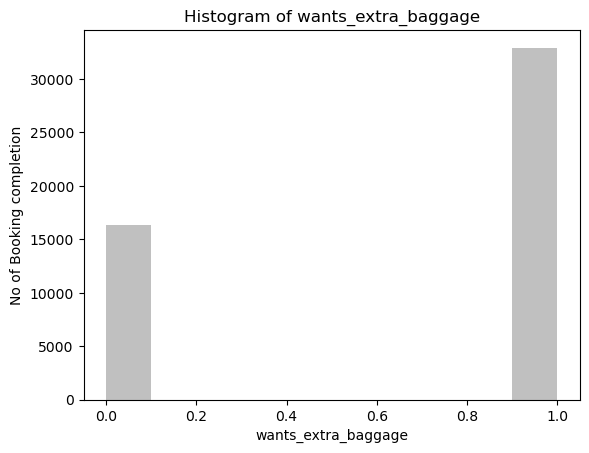

In [159]:
# histogram
plt.hist(df.wants_extra_baggage,color='silver')
plt.xlabel('wants_extra_baggage')
plt.ylabel('No of Booking completion')
plt.title('Histogram of wants_extra_baggage')
plt.show()

### wants_preferred_seat is a categorical variable

In [133]:
df.wants_preferred_seat.value_counts()

wants_preferred_seat
0    34712
1    14569
Name: count, dtype: int64

Here 0 represents that the people didn't opted for any preference in seat where as 1 represents the people who have opted for any preference in seat

In [138]:
# If you want to print the numbers you can print
df.groupby('wants_preferred_seat')['booking_complete'].sum()

wants_preferred_seat
0    4803
1    2588
Name: booking_complete, dtype: int64

Here 0 represents that the people didn't opted for any preference in seat and they have completed their booking  where as 1 represents the people who have opted for any preference in seat and they have booked the seat

### Anova Test

In [143]:
model_wants_preferred_seat = ols('booking_complete ~wants_preferred_seat ',data = df).fit()
anova_wants_preferred_seat = sm.stats.anova_lm(model_wants_preferred_seat)
anova_wants_preferred_seat

,df,sum_sq,mean_sq,F,PR(>F)
wants_preferred_seat,1.0,15.825543,15.825543,124.44625,7.285791e-29
Residual,49279.0,6266.696930,0.127168,NaN,NaN


wants_extra_baggage is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)

If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant

## wants_in_flight_meals is a categorical variable.

In [141]:
df.wants_in_flight_meals.value_counts()

wants_in_flight_meals
0    28256
1    21025
Name: count, dtype: int64

Here 0 represents that the people didn't opted for any meal in plane where as 1 represents the people who have opted for any meal in plane.

In [142]:
# If you want to print the numbers you can print
df.groupby('wants_in_flight_meals')['booking_complete'].sum()

wants_in_flight_meals
0    4008
1    3383
Name: booking_complete, dtype: int64

Here 0 represents that the people didn't opted for any meal and they have completed their booking  where as 1 represents the people who have opted for any meal and they have booked the seat.

### Anova Test

In [144]:
model_wants_in_flight_meals = ols('booking_complete ~wants_in_flight_meals ',data = df).fit()
anova_wants_in_flight_meals = sm.stats.anova_lm(model_wants_in_flight_meals)
anova_wants_in_flight_meals

,df,sum_sq,mean_sq,F,PR(>F)
wants_in_flight_meals,1.0,4.378329,4.378329,34.366796,4.593443e-09
Residual,49279.0,6278.144144,0.127400,NaN,NaN


wants_extra_baggage is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)

If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant

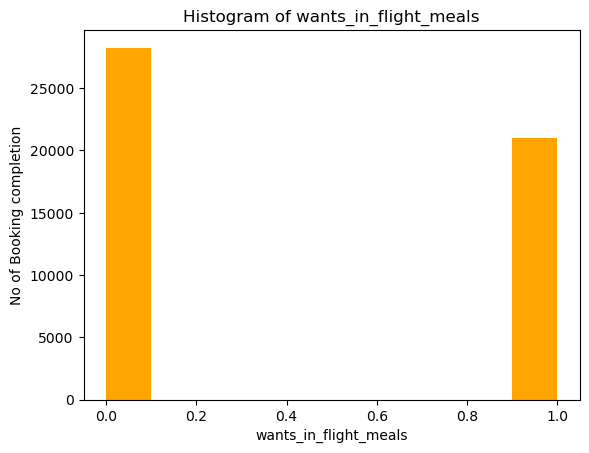

In [158]:
# histogram
plt.hist(df.wants_in_flight_meals,color='orange')
plt.xlabel('wants_in_flight_meals')
plt.ylabel('No of Booking completion')
plt.title('Histogram of wants_in_flight_meals')
plt.show()

### flight_duration is a continuous variable

In [148]:
df.flight_duration.describe()

count    49281.000000
mean         7.279974
std          1.496390
min          4.670000
25%          5.620000
50%          7.570000
75%          8.830000
max          9.500000
Name: flight_duration, dtype: float64

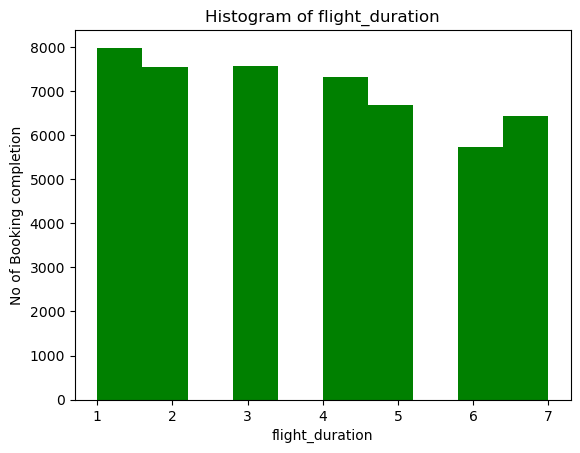

In [156]:
# histogram
plt.hist(df.flight_day,color='green')
plt.xlabel('flight_duration')
plt.ylabel('No of Booking completion')
plt.title('Histogram of flight_duration')
plt.show()

In [154]:
df.flight_duration.value_counts()

flight_duration
8.83    14339
8.58     6892
5.62     5464
6.62     4658
7.00     3314
7.57     2785
4.67     2699
6.42     1708
5.33     1506
4.75     1246
6.33     1178
8.67      787
5.52      664
5.07      501
4.72      486
8.15      299
5.00      237
7.42      221
4.83      145
5.13      116
9.50       36
Name: count, dtype: int64

In [164]:
# If you want to print the numbers you can print
df.groupby('flight_duration')['booking_complete'].sum()

flight_duration
4.67     667
4.72     117
4.75     416
4.83      19
5.00      57
5.07     119
5.13      28
5.33     381
5.52      52
5.62     514
6.33     194
6.42     369
6.62     799
7.00     727
7.42      34
7.57     498
8.15       1
8.58     538
8.67     185
8.83    1671
9.50       5
Name: booking_complete, dtype: int64

### Anova Test

In [165]:
model_flight_duration = ols('booking_complete ~flight_duration ',data = df).fit()
anova_flight_duration = sm.stats.anova_lm(model_flight_duration)
anova_flight_duration

,df,sum_sq,mean_sq,F,PR(>F)
flight_duration,1.0,71.296344,71.296344,565.655225,2.491830e-124
Residual,49279.0,6211.226130,0.126042,NaN,NaN


wants_extra_baggage is a good predictor (If the p_value is less than level of significance that is 0.05 then it is a good predictor)

If the P-value is smaller than the level of significance (0.05), then it suggests that the observed relationship between the feature and the target variable is statistically significant

In [167]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49276,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49277,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49278,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49279,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [169]:
df1=df.copy()

In [171]:
#encoding the categorical feature with label encoding.
from sklearn.preprocessing import LabelEncoder
categorical=['route','booking_origin','sales_channel','trip_type']
le=LabelEncoder()
for i in categorical:
    df1[i]=le.fit_transform(df1[i])

In [172]:
df1

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49276,2,0,2,27,6,9,6,720,4,1,0,1,5.62,0
49277,1,0,2,111,6,4,7,720,4,0,0,0,5.62,0
49278,1,0,2,24,6,22,6,720,4,0,0,1,5.62,0
49279,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


### Splitting the dataset

In [175]:
X=df1.drop(columns='booking_complete',axis=1)
y=df1.booking_complete

In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Building the model

In [177]:
model1 = RandomForestRegressor(n_estimators=100,random_state=0)
model1.fit(X_train,y_train)
y_train_pred=model1.predict(X_train)
y_test_pred=model1.predict(X_test)

In [178]:
from sklearn.metrics import mean_squared_error,r2_score
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)

In [179]:
print(f'MSE_y_train ={train_mse}')
print(f'MSE_y_test ={test_mse}')

MSE_y_train =0.016088593438829808
MSE_y_test =0.11594254076690308


In [180]:
print(f'RMSE_y_train ={np.sqrt(train_mse)}')
print(f'RMSE_y_test ={np.sqrt(test_mse)}')

RMSE_y_train =0.1268408192926465
RMSE_y_test =0.3405033638114359


In [181]:
print(f'train_r-squared ={r2_score(y_train,y_train_pred)}')
print(f'test_r-squared ={r2_score(y_test,y_test_pred)}')

train_r-squared =0.8733022356497898
test_r-squared =0.09874343663493856
